In [1]:
%run Latex_macros.ipynb

<IPython.core.display.Latex object>

In [2]:
%run beautify_plots.py

In [3]:
# My standard magic !  You will see this in almost all my notebooks.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

%matplotlib inline

In [4]:
import pandas as pd
import numpy as plt

import matplotlib.pyplot as plt

import os 

import cnn_helper
%aimport cnn_helper
cnnh = cnn_helper.CNN_Helper()

# Convolutional Neural Networks

Our introduction was of a very limited Convolutional Layer
- Recognizing a single feature
- One dimensional

We will relax each restriction in turn.

# Multiple features

Recall that a Fully Connected layer may have multiple units, so as to compute *multiple* features.


A Fully Connected/Dense Layer producing multiple features at layer $\ll$ computes
$$
\y_{\llp,j} = a_\llp( \y_{(\ll-1)} \cdot \W_{\llp,j} )
$$
using separate weights to recognize each feature

<div>
    <center><strong>Fully connected, two features</strong></center>
    <br>
<img src=images/FC_2feature.jpg>
    </div>

Similary. a Convolutional layer may compute *multiple* features:
- Using separate kernels to recognize each output feature map
- Indicated via separate colors

<div>
    <center><strong>CNN layer, multiple features</strong></center>
    <br>
<img src=images/Conv1d_2feature_diag.jpg>
    </div>

Each output feature, of the same shape as the spatial dimension of the input, is called a *feature map*

- Different feature maps $\y_{\llp,j}$ use *different* kernels
    - e.g., $\kernel_{\llp,1}, \kernel_{\llp,2}, \ldots$
- But are applied over the *same* input locations
- Recognizing *different* features at the same location
- e.g., $\y_{\llp,1}, \y_{\llp,2}, \ldots$

<div>
    <center><strong>Conv 1D, single input, multiple output features</strong></center>
    <br>
<img src=images/Conv1d_2feature.jpg>
    </div>

# Notation

## Input dimensions: Spatial, channel

Our examples thus far have input layers that are one dimensional (having a single feature).

This will not always be the case:
- When Convolutional Layer $\ll$ creates *multiple* features, as above
- Layer $\ll$ output is 2 dimensional

We will soon deal with even higher dimensional inputs (e.g, 3 dimensional).

First, some common terminology.

Suppose the input $\y_{(\ll-1)}$ is $(N+1)$ dimensional of shape 
$$
|| \y_{(\ll-1)} || = (\dim_{(\ll-1),1} \times \dim_{(\ll-1),2} \times \ldots \dim_{(\ll-1),N} \times n_{(\ll-1)} )
$$

(Thus far: $N = 1$ and $n_{(\ll-1)} = 1$ but that will soon change)

The first $N$ dimensions $(\dim_{(\ll-1),1} \times \dim_{(\ll-1),2} \times \ldots \dim_{(\ll-1),N} )$
- Are called the *spatial* dimensions

The last dimension (of size $ n_{(\ll-1)}$)
- Indexes the  features i.e., varies over the number of features
- Called the *feature* or *channel* dimension

**Notation**

- $N$ denotes the *number* of spatial dimensions
- $n_\llp$ denotes the *number of features* in layer $\ll$
- Thus far: $N = n_\llp = 1 $

Rather than treating the single feature input as a special case
- The shape of $\y_{(\ll-1)}$ would be better written with an extra dimension of length 1:
$$
|| \y_{(\ll-1)} || = (\dim_{(\ll-1),1} \times \dim_{(\ll-1),2} \times \ldots \dim_{(\ll-1),N} \times \mathbf{1} )
$$
- More clearly indicating that layer $\ll-1$ has just one feature

With this terminology we can say that a Convolution
- Uses a different kernel $\kernel_{\llp,j}$ for each output feature/channel $1 \le j \le n_\llp$
- Applies this kernel to *each* element in the *spatial* dimensions
- Feature map for feature number $1 \le j \le n_\llp$
    - Is of same shape as the spatial dimension
    - Recognizing a single feature at each location within the spatial dimension


## Channel Last/First

As we have seem: we are dealing with objects of $(N+1)$ dimensions
- Have identified the first $N$ dimensions as "spatial"
- The last ($(N+1)^{th}$) as the feature/channel dimension

This is known as *channel last* because the feature/channel dimension is the last.

Some toolkits
- Identify the *first* dimension as the feature/channel dimension
- The remaining $N$ dimensions as the spatial dimensions

This is called *channel first* because the feature/channel dimension is first.

You may arrange the data in Keras according to *either* convention, but it defaults to channel last so we will use that as well.

That's why we write the output of layer $\ll$ at feature $j$ as
$$
\y_{\llp, \ldots, j}
$$
where the dots ($\ldots$) indicate the (variable number of) spatial dimensions

# Conv1d when input layer has multiple features: $n_{(\ll-1)} > 1$

Our examples thus far have input layer $(\ll-1)$ with a single feature

How does a convolution work when the input layer has *more than one* feature ?
- As would be the case of layer $\ll$ which is the *result* of applying a Convolutional Layer to layer $\ll-1$

The answer is that we again slide a kernel over each location in the spatial dimension
- **but** each spatial location is now a *vector* of all $n_{(\ll-1)}$ input features
- Hence the kernel has an extra dimension of length $n_{(\ll-1)}$
    - That is, of shape $(f_\llp \times n_{(\ll-1)})$

<div>
    <center><strong>Conv 1D: 2 input features: kernel 1</strong></center>
    <br>
<img src=images/Conv1d_2feature_kernel.jpg>
    </div>

**Note**: Weights notation
- $\mathbf{w}_{\llp,k,j,f}$
    - layer $\ll$
    - output feature $k$
    - spatial location $j$
    - input feature $f$

**Note**

- Dot product is only defined over one dimensional vectors
- When we use "dot product" on two higher dimensional objects of the same shape:
    - Element-wise product
    - Reduced to a scalar by summing the products
- Consider it to be the dot product of the flattened versions of the two objects

Let's illustrate how this works.
- Output feature 1
- Spatial location 1

<div>
    <center><strong>Conv 2D: 2 features to 3 features: kernel 1</strong>/center>
    <br>
<img src=images/Conv1d_2feature_to_3feature_1.jpg>
    </div>

- Output feature 1
- Spatial location 2

<div>
    <center><strong>Conv 2D: 2 features to 3 features: kernel 1</strong></center>
    <br>
<img src=images/Conv1d_2feature_to_3feature_2.jpg>
    </div>

- Output feature 2
- Spatial location 1

<div>
    <center><strong>Conv 2D: 2 features to 3 features: kernel 2</strong></center>
    <br>
<img src=images/Conv1d_2feature_to_3feature_3.jpg>
    </div>

- Output feature 2
- Spatial location 2

<div>
    <center><strong>Conv 2D: 2 features to 3 features: kernel 2</strong></center>
    <br>
<img src=images/Conv1d_2feature_to_3feature_4.jpg>
    </div>

With an input layer having $N$ spatial dimensions, a Convolutional Layer $\ll$ producing $n_\llp$ features
- Preserves the "spatial" dimensions of the input
- Replaces the channel/feature dimensions

That is\
$$
\begin{array}\\
|| \y_{(\ll-1)} || & = & (n_{(\ll-1),1} \times n_{(\ll-1),2} \times \ldots n_{(\ll-1),N }, & \mathbf{n_{(\ll-1)}} ) \\
|| \y_\llp || &  = & (n_{(\ll-1),1} \times n_{(\ll-1),2} \times \ldots n_{(\ll-1),N},  &\mathbf{n_\llp} )
\end{array}
$$




# Conv2d: Two dimensional convolution ($N = 2$)

Thus far, the spatial dimension has been of length $N = 1$.

Generalizing  to $N = 2$ is straightforward.


For example, here is a two dimensional convolution with a single input and output feature ($n_{(\ll-1)} = n_\llp =  1$)
- Kernel 
    - Two spatial dimensions of size $f_\llp$ each
    - A single input feature dimension of size $n_{(\ll-1)} = 1$  
    - Dimension $(f_\llp \times f_\llp \times n_{(\ll-1)})$

- Is "slid" over 2 dimensional segments of the input
- The "dot product" of the kernel and a two dimensional region of $\y_{(\ll-1)}$ is performed
- There are $n_\llp =1$ kernels and output features

<div>
    <center><strong>Conv 2D: single input feature: kernel 1</strong></center>
    <br>
<img src=images/Conv2d_singlefeature_input_kernel.jpg>
    </div>

$\kernel_{\llp, j, j'}$
- layer $\ll$
- output feature $j$
- input feature $j'$

<div>
    <center><strong>Conv 2D, single input, single output feature: padding at border</strong></center>
    <br>
<img src=images/Conv2d_2.jpg width=900>
    </div>

<div>
    <center><strong>Conv 2D, single input, single output feature: padding at borderpadding at border</strong></center>
    <br>
<img src=images/Conv2d_3.jpg width=900>
    </div>

The above example was for a single feature.

Of course, we can (and it's common) to recognize multiple features ($n_\llp > 1$)

<div>
    <center><strong>Conv 2D, single input, multiple output feature: padding at border</strong></center>
    <br>
<img src=images/Conv2d_2feature.jpg width=900>
    </div>

Dealing with multiple input features works similarly as for $N=1$:
- The dot product
- Is over a spatial region that now has a "depth" $n_{(\ll-1)}$ equal to the number of input features
- Which means the kernel has a depth $n_{(\ll-1)}$

<div>
    <center>Conv 2D: multiple input features: kernel 1</center>
    <br>
<img src=images/Conv2d_multifeature_input_kernel.jpg>
    </div>

$\kernel_{\llp, j, j'}$
- layer $\ll$
- output feature $j$
- input feature $j'$

<div>
    <center>Conv 2D, multiple input, single output feature: padding at border</center>
    <br>
<img src=images/Conv3d_1.png>
    </div>

When we compute *multiple* feature maps, we get

<div>
    <center><strong>Conv 2D, multiple input, multiple output features</strong></center>
    <br>
<img src=images/Conv3d_2.png>
    </div>

# Conv2d in action

Pre-Deep Learning: manually specified filters have a rich history for image recognition.

Here is a list of manually constructed kernels (templates) that have proven useful
- [list of filter matrices](https://en.wikipedia.org/wiki/Kernel_(image_processing))

Let's see some in action to get a better intuition.

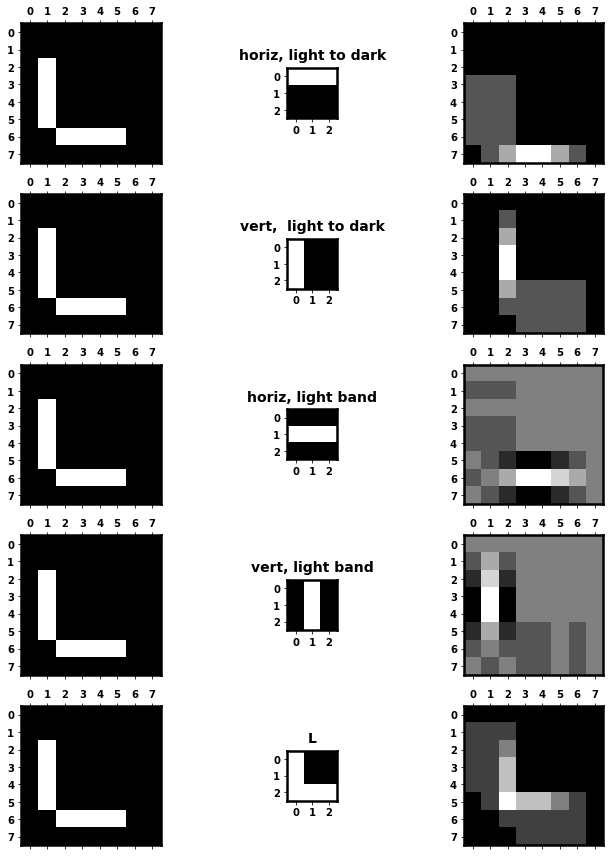

In [5]:
_= cnnh.plot_convs()

- A bright element in the output indicates a high, positive dot product
- A dark element in the output indicates a low (or highly negative) dot product

In our example
- $N = 2$: Two spatial dimensions
- One input feature: $n_{(\ll-1)} = 1$ 
- One output feature $n_\llp = 1$
- $f_\llp = 3$
    - Kernel is $(3 \times 3 \times 1)$.

The template match will be maximized when
- high values in the input correspond to high values in the matching location of the template
- low values in the input correspond to low values in the matching locations of the template

# Training a CNN

Hopefully you understand how kernels are "feature recognizers".

But you may be wondering: how do we determine the weights in each kernel ?

Answer: a Convolutional Layer is "just another" layer in a multi-layer network
- The kernels are just weights (like the weights in Fully Connected layers)
- We solve for all the weights $\W$ in the multi-layer network in the same way


The answer is: exactly as we did in Classical Machine Learning
- Define a loss function that is parameterized by $\W$: 
$$\loss = L(\hat{\y},\y; \W)$$

- The kernel weights are just part of $\W$
- Our goal is to find $\W^*$ the "best" set of weights
$$
\W^* = \argmin{W} L(\hat{\y},\y; \W)
$$
- Using Gradient Descent !

In other words: their is nothing special about finding the "best" kernels.

In [6]:
print("Done")

Done
